LUKASZ ZAJAC

## Spark cluster intro Air quality examples

### Initialization
Create and attach cluster created in EMR. 

The important configuration options:
 - Amazon EMR version: emr-7.1.0
 - Installed applications: JupyterHub 1.5.0
 - Logs in Amazon S3: disabled
 - Service role for Amazon EMR: EMR_DefaultRole 
 - EC2 instance profile: EMR_EC2_DefaultRole
 - EC2 security groups (firewall): open ports 9443, 18080
 
Login: jovyan, password: jupyter

In [ ]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
spark = SparkSession.builder.getOrCreate()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%configure -f
{
    "conf": {
        "spark.pyspark.python": "python3",
        "spark.pyspark.virtualenv.enabled": "true",
        "spark.pyspark.virtualenv.type":"native",
        "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv"
    }
}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
6,application_1731674098412_0007,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
6,application_1731674098412_0007,pyspark,idle,Link,Link,None,✔


In [ ]:
# run once per session to install additional packages
sc.install_pypi_package("pandas")
sc.install_pypi_package("matplotlib")


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Not uninstalling python-dateutil at /usr/lib/python3.9/site-packages, outside environment /mnt1/yarn/usercache/livy/appcache/application_1731674098412_0007/container_1731674098412_0007_01_000001/tmp/spark-2aa032f0-80e8-49c7-a491-82aff9ac347b
    Can't uninstall 'python-dateutil'. No files were found to uninstall.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 2.15.30 requires python-dateutil<=2.8.2,>=2.1, but you have python-dateutil 2.9.0.post0 which is incompatible.


In [ ]:
sc.install_pypi_package("geopandas")


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
from pyspark.sql.functions import col, mean
import matplotlib.pyplot as plt
import pandas as pd
import time

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Reading data from AWS S3

Now we can read a small sample of data:

In [ ]:
start = time.time()

smog_df = spark \
    .read \
    .format("csv") \
    .option("compression", "gzip") \
    .option("header", True) \
    .load("s3a://openaq-data-archive/records/csv.gz/locationid=10*/year=2022/month=05/*.csv.gz")
    #.load("s3a://openaq-data-archive/records/csv.gz/locationid=2178/year=2022/month=05/location-2178-20220503.csv.gz")\

end = time.time()
print(end - start)

The code failed because of a fatal error:
	Session 0 did not start up in 60 seconds..

Some things to try:
a) Make sure Spark has enough available resources for Jupyter to create a Spark context.
b) Contact your Jupyter administrator to make sure the Spark magics library is configured correctly.
c) Restart the kernel.


In [ ]:
# Further queries on smog_df will run much faster when we cache this data set in memory
smog_df.cache()

The code failed because of a fatal error:
	Session 0 did not start up in 60 seconds..

Some things to try:
a) Make sure Spark has enough available resources for Jupyter to create a Spark context.
b) Contact your Jupyter administrator to make sure the Spark magics library is configured correctly.
c) Restart the kernel.


In [ ]:
start = time.time()
smog_df.count()
end = time.time()
print(end - start)

The code failed because of a fatal error:
	Session 0 did not start up in 60 seconds..

Some things to try:
a) Make sure Spark has enough available resources for Jupyter to create a Spark context.
b) Contact your Jupyter administrator to make sure the Spark magics library is configured correctly.
c) Restart the kernel.


In [ ]:
smog_df.printSchema()

The code failed because of a fatal error:
	Session 0 did not start up in 60 seconds..

Some things to try:
a) Make sure Spark has enough available resources for Jupyter to create a Spark context.
b) Contact your Jupyter administrator to make sure the Spark magics library is configured correctly.
c) Restart the kernel.


In [ ]:
smog_df = smog_df.withColumn("value", smog_df.value.cast('double'))

The code failed because of a fatal error:
	Session 0 did not start up in 60 seconds..

Some things to try:
a) Make sure Spark has enough available resources for Jupyter to create a Spark context.
b) Contact your Jupyter administrator to make sure the Spark magics library is configured correctly.
c) Restart the kernel.


### Simple queries

In [ ]:
smog_df.limit(10).show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+----------+--------------------+--------------------+---------+---------+---------+-----+-------+
|location_id|sensors_id|            location|            datetime|      lat|      lon|parameter|units|  value|
+-----------+----------+--------------------+--------------------+---------+---------+---------+-----+-------+
|      10618|     35276|Kędzierzyn-Koźle,...|2022-05-17T01:00:...|50.349608|18.236575|     pm10|µg/m³|  15.62|
|      10618|     35276|Kędzierzyn-Koźle,...|2022-05-17T02:00:...|50.349608|18.236575|     pm10|µg/m³|13.6041|
|      10618|     35276|Kędzierzyn-Koźle,...|2022-05-17T03:00:...|50.349608|18.236575|     pm10|µg/m³|13.7349|
|      10618|     35276|Kędzierzyn-Koźle,...|2022-05-17T04:00:...|50.349608|18.236575|     pm10|µg/m³|15.1872|
|      10618|     35276|Kędzierzyn-Koźle,...|2022-05-17T05:00:...|50.349608|18.236575|     pm10|µg/m³|13.0822|
|      10618|     35276|Kędzierzyn-Koźle,...|2022-05-17T06:00:...|50.349608|18.236575|     pm10|µg/m³|14.0526|
|

In [ ]:
smog_df.select('parameter').distinct().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+
|parameter|
+---------+
|       co|
|     pm10|
|      so2|
|      no2|
|       bc|
|     pm25|
|       o3|
+---------+

In [ ]:
from pyspark.sql.functions import col, asc, desc, max

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Some more interesting statistics

In [ ]:
start = time.time()
max_pm10 = smog_df.filter(col('parameter')=='pm10')\
            .filter(col('value')>0.0)\
            .groupby('location').agg(max('value').alias('max_pm10'))\
            .sort(desc('max_pm10'))

max_pm10.limit(100).show(truncate=False)
end = time.time()
print(end - start)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------------------------------+-----------+
|location                                        |max_pm10   |
+------------------------------------------------+-----------+
|Ballygunge, Kolkata - WBPCB-10918               |9999.9     |
|Govt. High School Shikarpur, Patna - BSPCB-10630|5631.1     |
|Sanjay Nagar, Ghaziabad - UPPCB-10919           |3490.0     |
|New Industrial Town, Faridabad - HSPCB-10920    |2217.0     |
|Mundka, Delhi - DPCC-10486                      |1787.0     |
|Sector 30, Faridabad - HSPCB-10820              |1309.16    |
|Nedre Langgate-10492                            |1187.386375|
|Mini Secretariat, Charkhi Dadri - HSPCB-10725   |1186.4     |
|Sector 11, Faridabad - HSPCB-10908              |1090.9     |
|Rajbansi Nagar, Patna - BSPCB-10599             |1003.2     |
|Sector-51, Gurugram - HSPCB-10825               |999.99     |
|Rishi Nagar, Kaithal - HSPCB-10905              |999.99     |
|Murthal, Sonipat - HSPCB-10906                  |999.9

In [ ]:
smog_df.filter(col('location').contains('Krak')).select('location').distinct().show(truncate=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------+
|location                        |
+--------------------------------+
|Kraków, ul. Bulwarowa-10516     |
|Kraków, Aleja Krasińskiego-10752|
+--------------------------------+

In [ ]:
max_pm10.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- location: string (nullable = true)
 |-- max_pm10: double (nullable = true)

In [ ]:
plt.figure()
max_pm10.limit(10).toPandas().plot.barh(x='location')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<Axes: ylabel='location'>

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

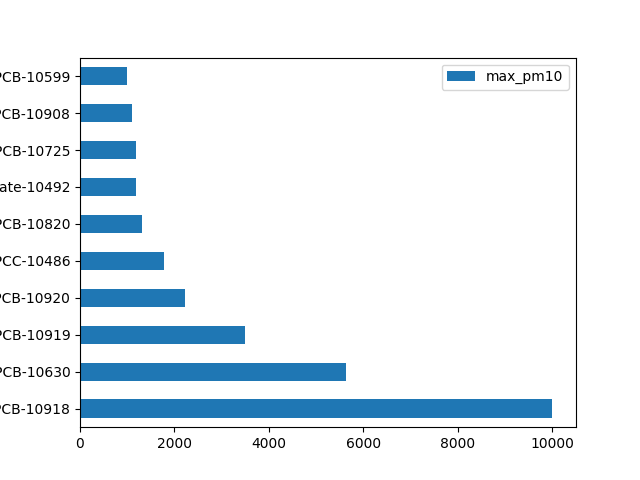

In [ ]:
# On EMR we need this magic to show the plot
%matplot plt

[1p.] Znajdź miasta w Polsce, w których średnie stężenie pyłu “pm25” było niższe niż maksymalne stężenie w Berlinie (w całym badanym okresie). Obliczenia wykonaj dla danych z kilku dni. Wyniki posortuj malejąco po stężeniu pm25.

szukam miasta ktore maja 

In [ ]:
start = time.time()

pm_data_df = smog_df.filter(col('parameter') == "pm25")

#average from KRakow

krakow_avg = pm_data_df.filter(col('location').contains('Krak')).select('location', 'value').groupby('location').agg(max('value').alias("max_value"))
krakow_avg.show()

towns_w_avg_smaller_than_Krak_max = pm_data_df.select('location', 'value')\
                                    .groupby('location').agg(mean('value').alias("average_value"))\
                                    .filter(col('average_value') < krakow_avg.first()["max_value"])

towns_w_avg_smaller_than_Krak_max.show()

end = time.time()
print(towns_w_avg_smaller_than_Krak_max.count())
print(end - start)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------+
|            location|max_value|
+--------------------+---------+
|Kraków, ul. Bulwa...|  51.5312|
|Kraków, Aleja Kra...|  46.1388|
+--------------------+---------+

+--------------------+------------------+
|            location|     average_value|
+--------------------+------------------+
|Kalisz, ul. Wyszy...|14.556001503006014|
|Jelenia Góra, ul....|11.527470819999998|
|Elbląg, ul. Bażyń...| 7.518553060000003|
|Kędzierzyn-Koźle,...| 8.923870476190476|
| Olsztyn, ul. Pus...| 6.978349100529101|
|Gdańsk, ul. Leczk...|10.657297656903767|
|Wrocław, wyb. Con...|10.537640959999997|
|Wschowa ul. Kazim...| 9.890955895372235|
|Poznań, ul. Dąbro...| 9.932123126252506|
|       RS0036A-10879| 12.27520497487437|
|Ostróda, ul. Piłs...|10.936172159827215|
|Otwock, ul. Brzoz...| 11.46382450331126|
|Gdynia, ul. Poręb...| 9.883307821576764|
|Złoty Potok, Leśn...|11.443194705882355|
|Kraków, ul. Bulwa...|  9.53670564912281|
|       RS0033A-10858| 11.91878305220884|
|Pr

[1p.] Dla danych z wybranych kilku dni przedstaw w ujęciu godzinowym (wybierz czas UTC) najwyższe zanotowane stężenie pm10 w poszczególnych miastach z całego zbioru danych. Wyniki posortuj po rosnąco datach.


In [ ]:
from pyspark.sql.functions import col, max, date_trunc, to_timestamp

pm10_data = smog_df.filter(col("parameter") == "pm10")
pm10_data = pm10_data.withColumn("datetime", to_timestamp(col("datetime")))

pm10_hourly = (
    pm10_data
    .groupby("location", date_trunc("hour", col("datetime")).alias("datetime_hour"))
    .agg(max("value").alias("max_pm10"))
)
pm10_hourly_sorted = pm10_hourly.orderBy("datetime_hour", ascending=True)
print(pm10_hourly_sorted.count())
pm10_hourly_sorted.show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

107756
+--------------------+-------------------+--------+
|            location|      datetime_hour|max_pm10|
+--------------------+-------------------+--------+
|Mundka, Delhi - D...|2022-04-30 18:00:00|  1157.0|
|Thavakkara, Kannu...|2022-04-30 18:00:00|   66.32|
|Rabindra Sarobar,...|2022-04-30 18:00:00|    37.4|
|Ghusuri, Howrah -...|2022-04-30 18:00:00|   48.76|
|Muradpur, Patna -...|2022-04-30 18:00:00|   159.8|
|Ghusuri, Howrah -...|2022-04-30 19:00:00|   48.14|
|Hebbal 1st Stage,...|2022-04-30 19:00:00|   50.18|
|Mini Secretariat,...|2022-04-30 19:00:00|   175.6|
|Thavakkara, Kannu...|2022-04-30 19:00:00|    59.0|
|Polayathode, Koll...|2022-04-30 19:00:00|   85.24|
|Rabindra Sarobar,...|2022-04-30 19:00:00|    36.3|
|Industrial Area, ...|2022-04-30 19:00:00|    78.6|
|Buddha Colony, Mu...|2022-04-30 19:00:00|   44.93|
|ICRISAT Patancher...|2022-04-30 19:00:00|   120.0|
|Teri Gram, Gurugr...|2022-04-30 19:00:00|   198.0|
|Muradpur, Patna -...|2022-04-30 19:00:00|   278.1|
|Mund

[1p.] Znajdź ranking miast w Europie pod względem średniego zanieczyszczenia liczonego dla N najwyższych pomiarów pod względem “pm25” dla danych z kilku dni. 


In [ ]:
from pyspark.sql.functions import col, avg
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number


def zad3(N, dataframe):
    pm25_data = dataframe.filter(col("parameter") == "pm25")

    window_spec = Window.partitionBy("location").orderBy(col("value").desc())
    top_pm25_measurements = pm25_data
                            .withColumn("rank", row_number().over(window_spec))
                            .filter(col("rank") <= N)
    city_avg_top_pm25 = top_pm25_measurements
                        .groupby("location")
                        .agg(avg("value").alias("avg_top_pm25"))

    city_ranking = city_avg_top_pm25.orderBy(col("avg_top_pm25").desc())

    # Show the result
    city_ranking.show()
zad3(10, smog_df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|            location|      avg_top_pm25|
+--------------------+------------------+
|Muradpur, Patna -...|2881.0299999999997|
|Minnesundvegen, G...| 632.6580488000002|
|New Industrial To...|            584.65|
|Sanjay Nagar, Gha...|             561.5|
|Sector 11, Farida...|502.66999999999996|
|Mini Secretariat,...|458.41999999999996|
|Govt. High School...|341.72999999999996|
|Mundka, Delhi - D...|             321.3|
|Narela, Delhi - D...|             278.8|
|Sector-51, Gurugr...|           266.883|
|Teri Gram, Gurugr...|            259.62|
|Padre Las Casas I...|             245.9|
|ITO, Delhi - CPCB...|             243.6|
|Industrial Area, ...|214.54900000000004|
|Najafgarh, Delhi ...|             201.9|
|Civil Lines,  Ajm...|199.89000000000004|
|       Smestad-10894|188.16804739999998|
|Sector 30, Farida...|           186.875|
|City Center, Gwal...|             164.5|
|Rohini, Delhi - D...|             162.3|
+--------------------+------------

[2p.] Zwizualizuj na mapie średnie zanieczyszczenie w danym kraju dla wybranych kilku dni względem czasu (mapa + slider czasu albo zbiór klatek i animacja) dla wybranych państw.



In [ ]:
sc.install_pypi_package("plotly")


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
sc.install_pypi_package("folium")


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Not uninstalling markupsafe at /usr/lib64/python3.9/site-packages, outside environment /mnt1/yarn/usercache/livy/appcache/application_1731069217847_0005/container_1731069217847_0005_01_000001/tmp/spark-eee4bcd1-8d9e-48c2-a6ac-9ba66dbcb3d0
    Can't uninstall 'MarkupSafe'. No files were found to uninstall.
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Not uninstalling jinja2 at /usr/lib/python3.9/site-packages, outside environment /mnt1/yarn/usercache/livy/appcache/application_1731069217847_0005/container_1731069217847_0005_01_000001/tmp/spark-eee4bcd1-8d9e-48c2-a6ac-9ba66dbcb3d0
    Can't uninstall 'Jinja2'. No files were found to uninstall.


In [ ]:
from pyspark.sql.functions import col, date_trunc, mean

filtered_df = smog_df.filter(col("parameter") == "pm25")

filtered_df = filtered_df.withColumn("date", date_trunc("day", col("datetime")))

aggregated_df = filtered_df.groupBy("location", "date").agg(
    mean("value").alias("average_pollution")
)

locations_with_coords_df = aggregated_df.join(
    smog_df.select("location", "lat", "lon").distinct(),
    on="location",
    how="left"
)

locations_with_coords_df = locations_with_coords_df.filter(
    locations_with_coords_df.lat.isNotNull() & locations_with_coords_df.lon.isNotNull()
)

locations_with_coords_df.show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------------------+------------------+---------------+----------------+
|   location|               date| average_pollution|            lat|             lon|
+-----------+-------------------+------------------+---------------+----------------+
|Arica-10653|2022-05-06 00:00:00|              28.0|-18.47683929771|-70.287911433372|
|Arica-10653|2022-05-05 00:00:00|28.818181818181817|-18.47683929771|-70.287911433372|
|Arica-10653|2022-05-17 00:00:00|27.458333333333332|-18.47683929771|-70.287911433372|
|Arica-10653|2022-05-18 00:00:00|28.416666666666668|-18.47683929771|-70.287911433372|
|Arica-10653|2022-05-19 00:00:00|              26.0|-18.47683929771|-70.287911433372|
|Arica-10653|2022-05-16 00:00:00|24.136363636363637|-18.47683929771|-70.287911433372|
|Arica-10653|2022-06-01 00:00:00|              20.0|-18.47683929771|-70.287911433372|
|Arica-10653|2022-05-31 00:00:00|             20.75|-18.47683929771|-70.287911433372|
|Arica-10653|2022-05-26 00:00:00|21.666666666666668|-1

In [ ]:
import folium

# Create an initial world map
world_map = folium.Map(zoom_start=2)

# Iterate through the rows of the DataFrame and add markers to the map
for row in locations_with_coords_df.collect():
    location = row['location']
    lat = row['lat']
    lon = row['lon']
    avg_pollution = row['average_pollution']
    
    # Create a marker with popup showing the location and average pollution
    folium.Marker(
        location=[lat, lon], 
        popup=f"{location}: {avg_pollution:.2f} µg/m³",
        icon=folium.Icon(color='blue')
    ).add_to(world_map)

# Save the map to an HTML file
world_map.save("pollution_map.html")

# Display the map in the notebook
world_map


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Note: you may need to restart the kernel to use updated packages.


[3p.] Korzystanie z klastra dla dużych danych
Proszę wykonać zadanie 1 dla danych o tak dobranym rozmiarze, żeby czas zapytania wynosił co najmniej 10 minut. Zmierzyć czas wykonania.
Zwiększyć klaster do 2, 3, 4, 5, 6, 7 instancji workerów i zmierzyć czasy wykonania.
Narysować wykresy czasu, przyspieszenia, efektywności (time, speedup, efficiency).

In [ ]:
start = time.time()

smog_df = spark \
    .read \
    .format("csv") \
    .option("compression", "gzip") \
    .option("header", True) \
    .load("s3a://openaq-data-archive/records/csv.gz/locationid=10*/year=2022/month={01,02,03,04}/*.csv.gz")


end = time.time()
print(end - start)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

433.15549182891846

In [ ]:
smog_df = smog_df.withColumn("datetime", to_timestamp(col("datetime")))


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
smog_df.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Interrupted by user


In [ ]:
from datetime import datetime

smog_df = smog_df.filter(col("datetime") < datetime(2022, 6, 1))
smog_df.collect()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Interrupted by user


In [ ]:
cluster_statistics = {}

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
from pyspark.sql.functions import col, max, date_trunc, to_timestamp


def run_test(n_clusters):
    start_time = time.time()

    pm10_data = smog_df.filter(col("parameter") == "pm10")
    pm10_data = pm10_data.withColumn("datetime", to_timestamp(col("datetime")))
    pm10_data = pm10_data.repartition(n_clusters, col("location"))

    pm10_hourly = (
        pm10_data
        .groupby("location", date_trunc("hour", col("datetime")).alias("datetime_hour"))
        .agg(max("value").alias("max_pm10"))
    )
    pm10_hourly_sorted = pm10_hourly.orderBy("datetime_hour", ascending=True)
    print(pm10_hourly_sorted.count())
    end_time = time.time()
    duration = end_time - start_time
    pm10_hourly_sorted.show()
    cluster_statistics[n_clusters] = duration
    print(f"Number of workers: {n_clusters}, Execution Time: {duration} seconds")


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
run_test(1)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

343775
+--------------------+-------------------+--------+
|            location|      datetime_hour|max_pm10|
+--------------------+-------------------+--------+
|     Dandenong-10868|2021-12-31 14:00:00|   33.86|
|      Brooklyn-10826|2021-12-31 14:00:00|   31.97|
|    Alphington-10494|2021-12-31 14:00:00|   23.14|
|     Footscray-10584|2021-12-31 14:00:00|   33.06|
| Geelong South-10869|2021-12-31 14:00:00|   21.78|
|   Mooroolbark-10688|2021-12-31 14:00:00|   49.15|
|  Morwell East-10678|2021-12-31 14:00:00|   52.91|
|     Traralgon-10771|2021-12-31 14:00:00|    27.5|
|        Yinnar-10819|2021-12-31 14:00:00|     0.0|
|      Hopeland-10574|2021-12-31 15:00:00|     5.9|
|    Alphington-10494|2021-12-31 15:00:00|   31.98|
|     Footscray-10584|2021-12-31 15:00:00|   48.11|
| Geelong South-10869|2021-12-31 15:00:00|   20.33|
| Miles Airport-10734|2021-12-31 15:00:00|     6.5|
|     Dandenong-10868|2021-12-31 15:00:00|   28.72|
|   Mooroolbark-10688|2021-12-31 15:00:00|   38.31|
|Mora

In [ ]:
run_test(3)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

343775
+--------------------+-------------------+--------+
|            location|      datetime_hour|max_pm10|
+--------------------+-------------------+--------+
|        Yinnar-10819|2021-12-31 14:00:00|     0.0|
|     Footscray-10584|2021-12-31 14:00:00|   33.06|
|    Alphington-10494|2021-12-31 14:00:00|   23.14|
| Geelong South-10869|2021-12-31 14:00:00|   21.78|
|      Brooklyn-10826|2021-12-31 14:00:00|   31.97|
|   Mooroolbark-10688|2021-12-31 14:00:00|   49.15|
|     Dandenong-10868|2021-12-31 14:00:00|   33.86|
|     Traralgon-10771|2021-12-31 14:00:00|    27.5|
|  Morwell East-10678|2021-12-31 14:00:00|   52.91|
|     Footscray-10584|2021-12-31 15:00:00|   48.11|
|        Yinnar-10819|2021-12-31 15:00:00|     0.0|
| Geelong South-10869|2021-12-31 15:00:00|   20.33|
|    Alphington-10494|2021-12-31 15:00:00|   31.98|
|      Hopeland-10574|2021-12-31 15:00:00|     5.9|
|      Brooklyn-10826|2021-12-31 15:00:00|   41.09|
|   Mooroolbark-10688|2021-12-31 15:00:00|   38.31|
|    

In [ ]:
run_test(6)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

343775
+--------------------+-------------------+--------+
|            location|      datetime_hour|max_pm10|
+--------------------+-------------------+--------+
| Geelong South-10869|2021-12-31 14:00:00|   21.78|
|    Alphington-10494|2021-12-31 14:00:00|   23.14|
|     Footscray-10584|2021-12-31 14:00:00|   33.06|
|      Brooklyn-10826|2021-12-31 14:00:00|   31.97|
|  Morwell East-10678|2021-12-31 14:00:00|   52.91|
|     Dandenong-10868|2021-12-31 14:00:00|   33.86|
|   Mooroolbark-10688|2021-12-31 14:00:00|   49.15|
|        Yinnar-10819|2021-12-31 14:00:00|     0.0|
|     Traralgon-10771|2021-12-31 14:00:00|    27.5|
|    Alphington-10494|2021-12-31 15:00:00|   31.98|
|     Footscray-10584|2021-12-31 15:00:00|   48.11|
|      Brooklyn-10826|2021-12-31 15:00:00|   41.09|
|  Morwell East-10678|2021-12-31 15:00:00|   55.59|
| Miles Airport-10734|2021-12-31 15:00:00|     6.5|
|   Mooroolbark-10688|2021-12-31 15:00:00|   38.31|
|     Dandenong-10868|2021-12-31 15:00:00|   28.72|
|    

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

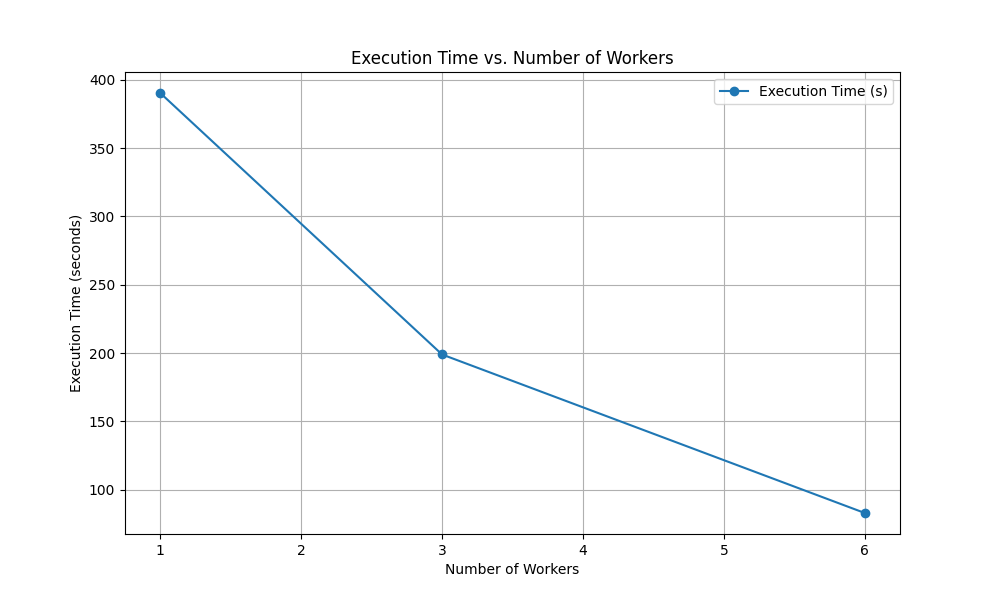

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

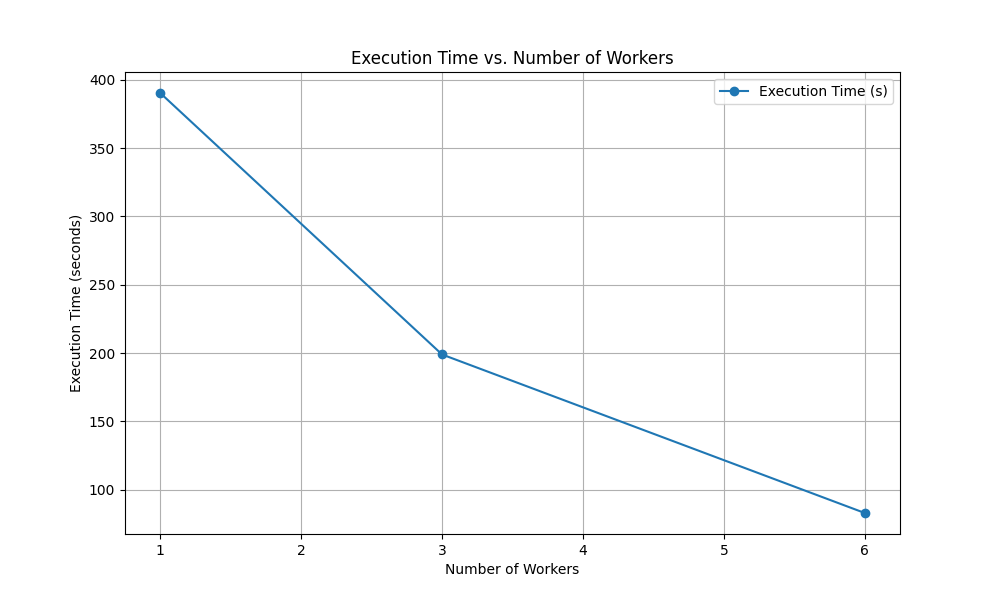

In [ ]:
import pandas as pd

# Convert results to DataFrame for easier calculations
df_stats = pd.DataFrame(list(cluster_statistics.items()), columns=['n_workers', 'execution_time'])

# Calculate speedup (relative to single worker time)
single_worker_time = df_stats[df_stats['n_workers'] == 1]['execution_time'].values[0]
df_stats['speedup'] = single_worker_time / df_stats['execution_time']

# Calculate efficiency (speedup / number of workers)
df_stats['efficiency'] = df_stats['speedup'] / df_stats['n_workers']

import matplotlib.pyplot as plt

# Plot execution time
plt.figure(figsize=(10, 6))
plt.plot(df_stats['n_workers'], df_stats['execution_time'], marker='o', label="Execution Time (s)")
plt.xlabel('Number of Workers')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs. Number of Workers')
plt.legend()
plt.grid(True)
plt.show()
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

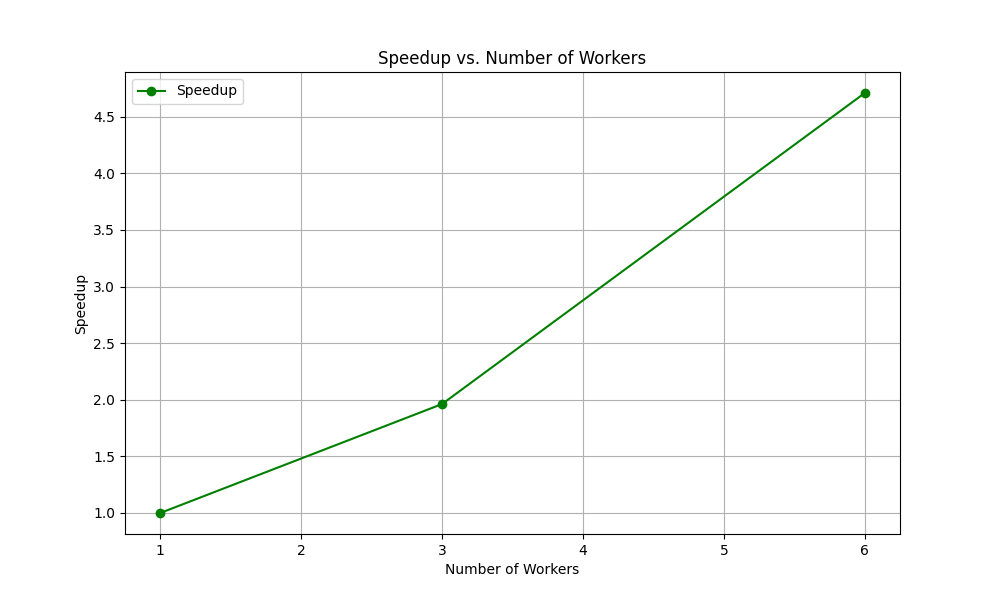

In [ ]:
# Plot speedup
plt.figure(figsize=(10, 6))
plt.plot(df_stats['n_workers'], df_stats['speedup'], marker='o', color='g', label="Speedup")
plt.xlabel('Number of Workers')
plt.ylabel('Speedup')
plt.title('Speedup vs. Number of Workers')
plt.legend()
plt.grid(True)
plt.show()
%matplot plt


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

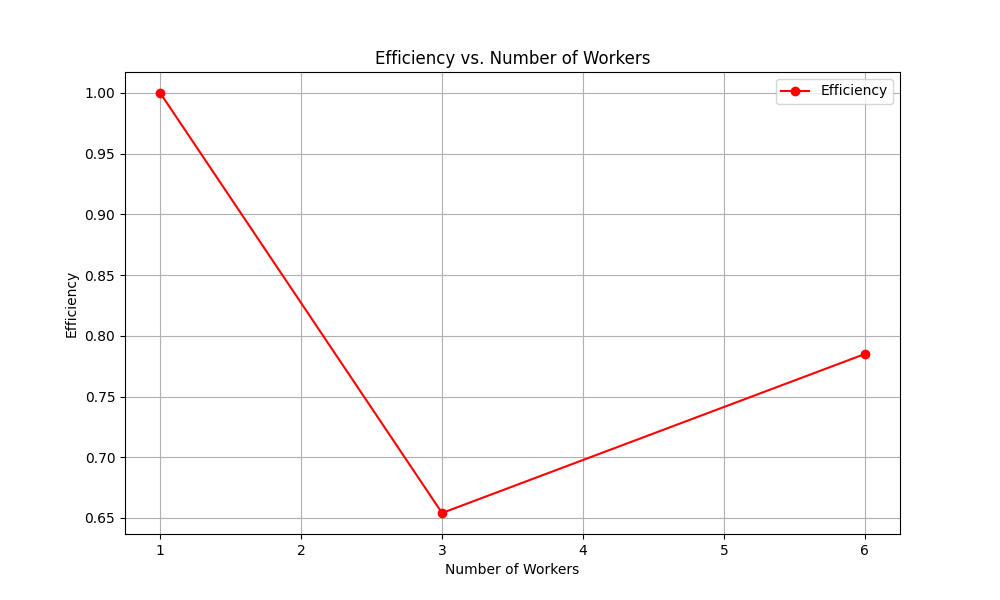

In [ ]:

# Plot efficiency
plt.figure(figsize=(10, 6))
plt.plot(df_stats['n_workers'], df_stats['efficiency'], marker='o', color='r', label="Efficiency")
plt.xlabel('Number of Workers')
plt.ylabel('Efficiency')
plt.title('Efficiency vs. Number of Workers')
plt.legend()
plt.grid(True)
plt.show()
%matplot plt

[1p.] Dla przykładowego zapytania załącz wybrane wykresy ze Spark UI (https://spark.apache.org/docs/latest/web-ui.html), np. DAG, diagram Gantta, informacje o rozmiarach danych.

![alt text](<Screenshot 2024-11-15 142338.png>)